<a href="https://colab.research.google.com/github/Aurora-MF/Semana-Tec/blob/main/09_2_actividad_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Estadística básica

* **Nombre:** Daniela Aurora Martinez Fajardo
* **Matrícula:** A01709293

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [1]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bestsellers with categories.csv to bestsellers with categories.csv
User uploaded file "bestsellers with categories.csv" with length 51161 bytes


In [3]:
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [4]:
# Escribe el código necesario para realizar el análisis estadístico descrito 
# anteriorment.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [13]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [15]:
df['Author'].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

In [5]:
df.describe

<bound method NDFrame.describe of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson

In [11]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


¿Cuáles son las variables relevantes e irrelevantes para el análisis?

*Si hablamos respecto a que columnas nos ayudaran a separar eficientemente el top de libros podriamos eliminar la comulna genero ya que es una division muy amplia y podemos eliminarla sin causar muchas complicaciones.* 

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
* ¿Existen variables que tengan datos extraños?
* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

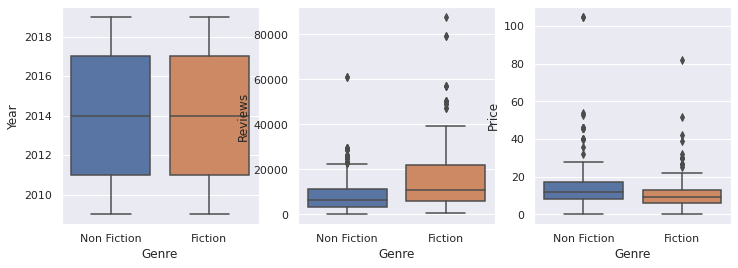

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(data=df, y = 'Year', x='Genre', ax=axs[0])
sns.boxplot(data=df, y = 'Reviews', ax=axs[1], x='Genre')
sns.boxplot(data=df, y = 'Price', ax=axs[2], x='Genre')

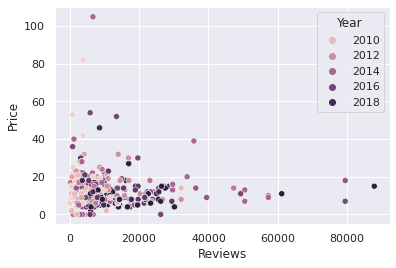

In [10]:
sns.scatterplot(data=df, x ='Reviews', y='Price', hue='Year')

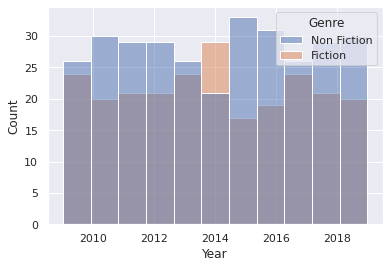

In [14]:
sns.histplot(data=df, x='Year', hue='Genre')

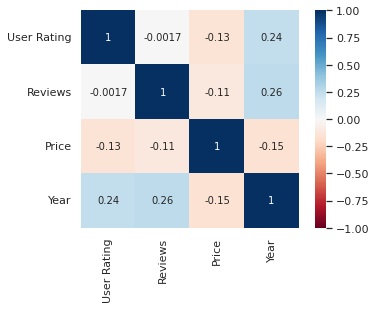

In [9]:
df_corr = df.corr()
sns.heatmap(data=df_corr, vmin=-1, vmax = 1, cmap='RdBu', annot=True, square=True)

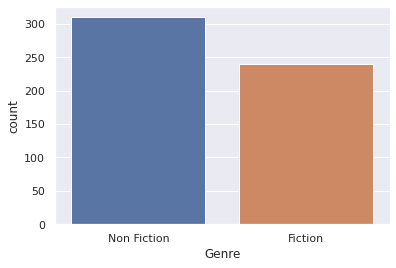

In [12]:
sns.countplot(data=df, x = 'Genre')

Text(0.5, 1.05, 'Gráfico de pares de las variables numéricas por género')

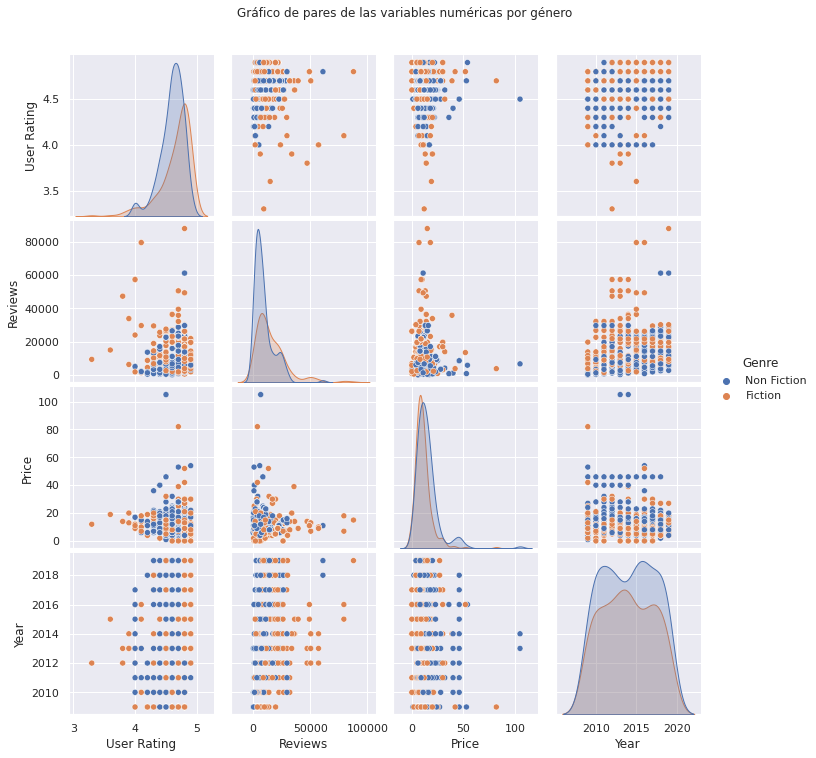

In [16]:
sns.pairplot(data=df, hue='Genre')
plt.suptitle('Gráfico de pares de las variables numéricas por género', y=1.05)

Luego de analizar las graficas podemos ver que la variable de User-rating no aporta mucho en las graficas generales asi como la variable de Genre a menos que se quiera hacer una grafica de eso especificamente, sin embargo no afectan a las demas estadisticas. Apesar de la cantidad de datos no de encuentra ningun dato erroneo pero si repetidos. La variables se encuentran en rango lo que permite una mejor visualizacion de los datos.




## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué? Si por que determinan las estadisticas y justifican el top de libros.
- ¿Cómo obtuviste el valor de $k$ a usar? con la verificacion de los datos
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo? Mas bajo
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes? Serian menos exactos
- ¿Qué puedes decir de los datos basándose en los centros? Delimitan los grupos para ser mas especificos 

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las variables a normalizar
numeric_cols = ['Price', 'User Rating',	'Reviews']
X = df.loc[:, numeric_cols]

# Hacemos el escalamiento.
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# El escalador nos genera una matriz de numpy. Vamos a convertirlo en DF
X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,Price,User Rating,Reviews
0,-0.470810,0.359990,0.460453
1,0.821609,-0.080978,-0.844786
2,0.175400,0.359990,0.599440
3,-0.655441,0.359990,0.808050
4,-0.101547,0.800958,-0.365880


In [25]:
# Implementa el algoritmo de kmeans y justifica la elección del número de 
# clusters. Usa las variables numéricas.
kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []

# Ciclo para calcular K-Means para diferentes k
for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k, random_state = 47)

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    sil_score.append(silhouette_score(X_norm, clusters))

Text(0.5, 1.0, 'Silhouette Score')

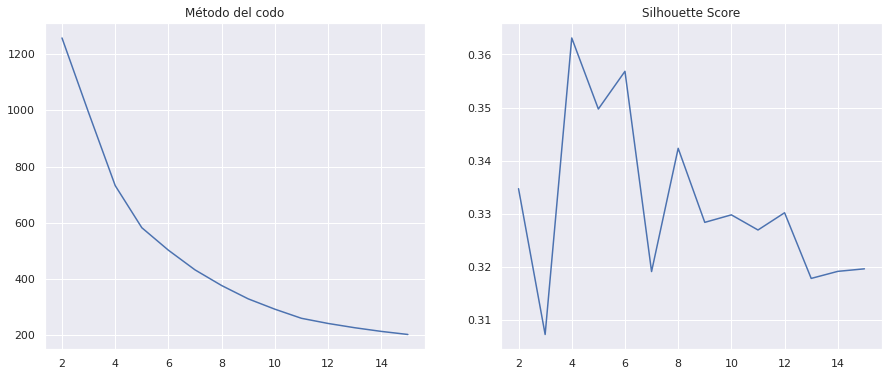

In [26]:
# Graficaremos el codo y silhouette score en la misma gráfica. Recorda que 
# subplots nos permite tener más gráficas en la misma figura.
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primera figura es el codo
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

# La segunda es el Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

-Cada grupo es un segmento de usuarios que compraron y evaluan los libros y separados por sus años de publicacion.

  Analisis de los grupos

In [27]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.
model = KMeans(n_clusters=6, random_state=47)
clusters = model.fit_predict(X_norm)
df['Grupo'] = clusters.astype('str')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Grupo
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,4
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,4


Text(0.5, 1.05, '6 grupos de clientes')

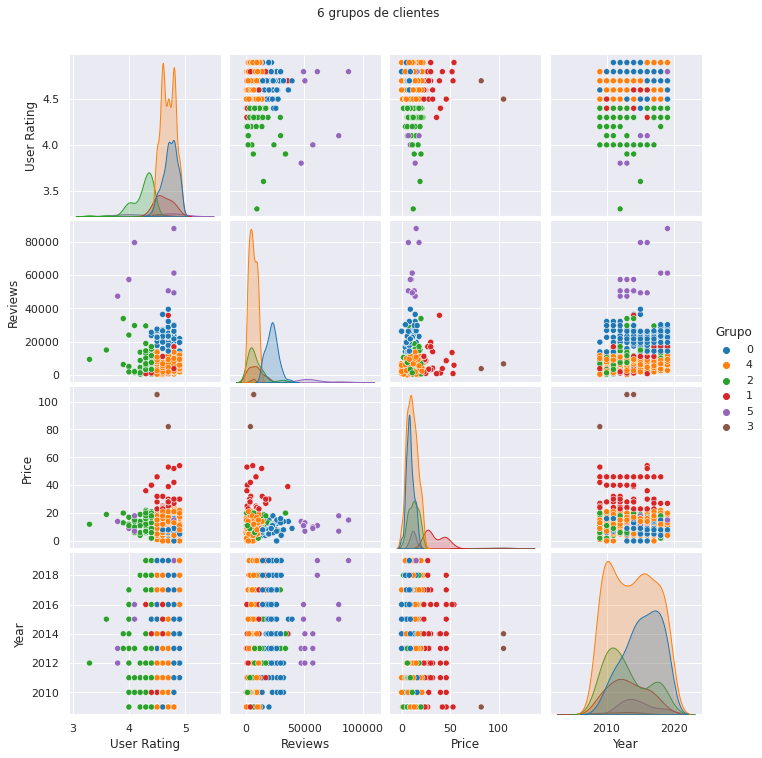

In [29]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.
sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('6 grupos de clientes', y=1.05)

In [31]:
import plotly.express as px

# Creamos la figura donde graficaremos
fig = px.scatter_3d(df, x = 'User Rating', y = 'Year', 
                    z = 'Reviews', 
                    title='6 grupos de clientes',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)

# mostramos la imagen
fig.show()

In [32]:
df.groupby('Grupo').mean()

,User Rating,Reviews,Price,Year
Grupo,,,,
0,4.727407,22135.555556,8.622222,2015.296296
1,4.616327,8457.918367,34.428571,2013.163265
2,4.243373,7951.469880,12.313253,2012.915663
3,4.566667,5719.666667,97.333333,2012.000000
4,4.693939,5903.750000,10.806818,2013.814394
5,4.412500,58490.375000,11.687500,2014.687500


In [33]:
df.groupby('Grupo').std()

,User Rating,Reviews,Price,Year
Grupo,,,,
0,0.124247,5124.291640,3.830098,2.685156
1,0.150481,6752.024011,9.635006,2.786477
2,0.198895,7223.612837,5.072469,3.132072
3,0.115470,1661.614075,13.279056,2.645751
4,0.120996,3246.461618,5.436515,3.304511
5,0.411299,12743.848100,2.891799,2.358495


Analisis de grupos

-Grupo 0 compran libros de menor precio dejan un mayor numero de reseñas en libros de 2015. 

-Grupo 1 compran libros mas caros pero no los mas caros y dejan un numero decente de reseñas en libros del 2013.

-grupo 2 precio moderado y menores reseñas en libros del 2012.

-grupo 3 compran los libros mas caros y dejan un numero menor de reseñas libros del 2012 mayormente.

-Grupo 4 precios moderados el menor numero de reseñas recibidas en libros del año 2013.

-Grupo 5 libros de precio bajo, aumento de reseñas en libros del año 2014.